In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils.preprocessing import *


In [37]:

H = 90
W = 160
image_resolution = 512


filename = "server/user_data/101385812797223_depthImage.txt"

img_filename = "server/user_data/101385812797223_rgbImage.jpg"


def extractDepth(x):
    depthConfidence = (x >> 13) & 0x7
    if (depthConfidence > 6): return 0
    return x & 0x1FFF


In [38]:
    
    depthData = np.fromfile(filename, dtype = np.uint16)
    depthMap = np.array([extractDepth(x) for x in depthData]).reshape(H,W)
    depthMap = cv2.rotate(depthMap, cv2.ROTATE_90_CLOCKWISE)

    f_depth = np.float32(depthMap)
    f_depth /= 1000

    print(f_depth.shape)
    print(f_depth.dtype)
    print(np.mean(f_depth))
    print(np.max(f_depth))
    print(np.min(f_depth))

(160, 90)
float32
1.3668643
1.629
1.086


In [39]:
    condition_img = f_depth
    condition_np = None
    if condition_img is not None:
        condition_np = np.asarray(condition_img, dtype=np.float32, order="C")
        condition_np = condition_np.astype(np.float32)
        #if image_resolution:
        #    condition_np = resize_image(condition_np, image_resolution, ref_min=False)

In [40]:
condition_np.shape

(160, 90)

In [35]:
    input_image = condition_np 
    resolution = image_resolution
    ref_min=True
    
    if len(input_image.shape) == 3:
        H, W, C = input_image.shape
    else:
        H, W = input_image.shape
    H = float(H)
    W = float(W)
    if ref_min:
        k = float(resolution) / min(H, W)
    else:
        k = float(resolution) / max(H, W)
        
    print(k)
    H *= k
    W *= k
    H = int(np.round(H / 64.0)) * 64
    W = int(np.round(W / 64.0)) * 64
    img = cv2.resize(input_image, (W, H), interpolation=cv2.INTER_LANCZOS4 if k > 1 else cv2.INTER_AREA)
    print(img.shape)


2.0
(1024, 512)


In [ ]:
def prepare_nyu_data(rgb_img, condition_img, image_resolution=512):

    if image_resolution:
        img_ = resize_image(rgb_img, image_resolution)

    img_ = img_.astype(np.uint8)

    condition_np = None
    if condition_img is not None:
        condition_np = np.asarray(condition_img.T, dtype=np.float32, order="C")
        condition_np = condition_np.astype(np.float32)
        condition_np = condition_np[10:-9, 10:-9]
        if image_resolution:
            condition_np = resize_image(condition_np, image_resolution)

    return img_, condition_np

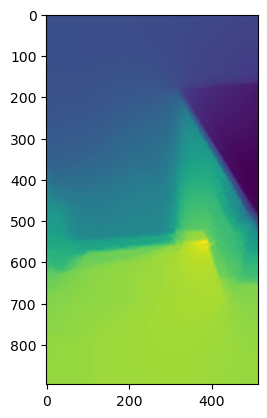

In [24]:
plt.imshow(condition_np)

In [41]:
img_np = cv2.imread(img_filename)

In [42]:
img_np.shape

(480, 640, 3)

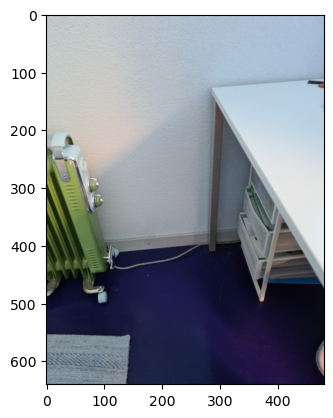

In [43]:
img_np = cv2.rotate(img_np, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_np)

In [44]:
    print(img_np.shape)
    print(img_np.dtype)
    print(np.mean(img_np))
    print(np.max(img_np))
    print(np.min(img_np))

(640, 480, 3)
uint8
127.7339333767361
255
0


In [45]:
rgb_img_resized = resize_image(img_np, 512)


In [47]:
rgb_H = rgb_img_resized.shape[0]
depth_resized = resize_image(condition_np, rgb_H, ref_min=False)

In [48]:
depth_resized.shape

(704, 384)

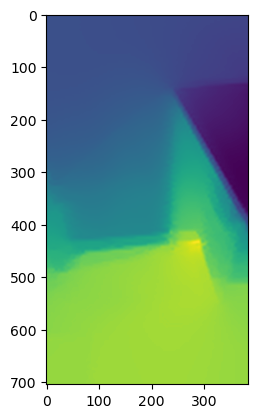

In [49]:
plt.imshow(depth_resized)

In [52]:
d_w = depth_resized.shape[1]
rgb_w = rgb_img_resized.shape[1]

pad_val = int((rgb_w-d_w) / 2)

depth_padded = np.pad(depth_resized,((0, 0), (pad_val, pad_val)), mode = 'constant')

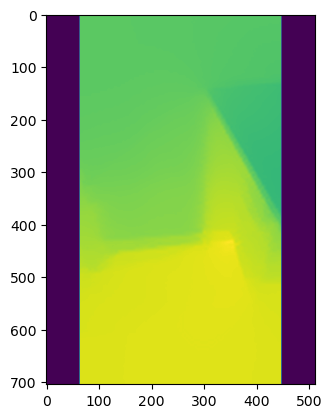

In [54]:
plt.imshow(depth_padded)

In [55]:
from server.arcore_handler import ARCoreHandler

filename = "server/user_data/101385812797223_depthImage.txt"

img_filename = "server/user_data/101385812797223_rgbImage.jpg"


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 1.13.1+cu117 with CUDA 1107 (you have 1.12.1+cpu)
    Python  3.8.10 (you have 3.8.16)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


KeyboardInterrupt: 